<a href="https://colab.research.google.com/github/Adityasaharan04/DIABETIC-RETINOPATHY/blob/main/Copy_of_DRetinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Define the directory path where your images are stored
data_dir = '/content/drive/MyDrive/gaussian_filtered_images'

# List all image files in the directory
image_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.png')]


In [ ]:
from PIL import Image, ImageFilter

def denoise_image(image_path):
    img = Image.open(image_path)
    blurred_img = img.filter(ImageFilter.GaussianBlur(radius=1))
    # You can add more denoising techniques here if needed
    return blurred_img

# Apply denoising to each image in the dataset
denoised_images = [denoise_image(image_path) for image_path in image_files]


In [ ]:
from PIL import Image, ImageFilter
from skimage.metrics import structural_similarity as compare_ssim
import numpy as np

def denoise_image(image_path):
    img = Image.open(image_path)
    blurred_img = img.filter(ImageFilter.GaussianBlur(radius=1))
    # You can add more denoising techniques here if needed
    return blurred_img

def calculate_metrics(original_image, denoised_image):
    # Convert images to numpy arrays
    original_array = np.array(original_image)
    denoised_array = np.array(denoised_image)

    # Calculate MSE
    mse = np.mean((original_array - denoised_array) ** 2)

    # Calculate PSNR
    max_pixel_value = 255.0
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))

    # Calculate SSIM
    ssim = compare_ssim(original_array, denoised_array, multichannel=True)

    return psnr, mse, ssim


In [ ]:
# Apply denoising to each image in the dataset and calculate metrics
psnr_list = []
mse_list = []
ssim_list = []

for image_path in image_files:
    original_image = Image.open(image_path)
    denoised_image = denoise_image(image_path)

    # Calculate metrics
    psnr, mse, ssim = calculate_metrics(original_image, denoised_image)
    psnr_list.append(psnr)
    mse_list.append(mse)
    ssim_list.append(ssim)

# Calculate average metrics
average_psnr = np.mean(psnr_list)
average_mse = np.mean(mse_list)
average_ssim = np.mean(ssim_list)

print(f'Average PSNR: {average_psnr}')
print(f'Average MSE: {average_mse}')
print(f'Average SSIM: {average_ssim}')


Average PSNR: 32.248704562783864
Average MSE: 38.74448607568027
Average SSIM: 0.6845147555437352


<ipython-input-4-ead4709c9081>:24: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = compare_ssim(original_array, denoised_array, multichannel=True)


In [ ]:
!pip install scikit-image


In [ ]:
from skimage.filters import frangi

def enhance_blood_vessels(image_path):
    img = Image.open(image_path)
    # Convert image to grayscale
    img_gray = img.convert('L')
    # Apply Frangi filter
    frangi_img = frangi(np.array(img_gray))
    # Convert filtered image back to PIL image
    enhanced_image = Image.fromarray((frangi_img * 255).astype(np.uint8))
    return enhanced_image


In [ ]:
from PIL import Image
import numpy as np
import os
from skimage.filters import frangi
from skimage.metrics import structural_similarity as compare_ssim

# Define the directory path where your images are stored
data_dir = '/content/drive/MyDrive/gaussian_filtered_images'

# List all image files in the directory
image_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.png')]

# Define function to enhance blood vessels using Frangi filter
def enhance_blood_vessels(image_path):
    img = Image.open(image_path)
    # Convert image to grayscale
    img_gray = img.convert('L')
    # Apply Frangi filter
    frangi_img = frangi(np.array(img_gray))
    # Convert filtered image back to RGB format
    enhanced_image = Image.fromarray((frangi_img[..., np.newaxis] * np.ones(3)).astype(np.uint8))
    return enhanced_image

# Apply blood vessel enhancement to each image in the dataset and calculate metrics
psnr_list = []
mse_list = []
ssim_list = []

for image_path in image_files:
    original_image = Image.open(image_path)
    enhanced_image = enhance_blood_vessels(image_path)

    # Convert images to numpy arrays
    original_array = np.array(original_image)
    enhanced_array = np.array(enhanced_image)

    # Calculate metrics
    mse = np.mean((original_array - enhanced_array) ** 2)
    psnr = 20 * np.log10(255.0 / np.sqrt(mse))
    ssim = compare_ssim(original_array, enhanced_array, multichannel=True)

    psnr_list.append(psnr)
    mse_list.append(mse)
    ssim_list.append(ssim)

# Calculate average metrics
average_psnr = np.mean(psnr_list)
average_mse = np.mean(mse_list)
average_ssim = np.mean(ssim_list)

print(f'Average PSNR: {average_psnr}')
print(f'Average MSE: {average_mse}')
print(f'Average SSIM: {average_ssim}')


Average PSNR: 30.18811343749252
Average MSE: 62.268587903911566
Average SSIM: 0.0001662334802884531


<ipython-input-14-d94a5f35acce>:40: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = compare_ssim(original_array, enhanced_array, multichannel=True)


In [ ]:
# Define the directory path to save processed images
output_dir = '/content/drive/MyDrive/processed_images'


In [ ]:
# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)


In [ ]:
# Save processed images
for i, enhanced_image in enumerate(enhanced_images):
    output_path = os.path.join(output_dir, f'processed_image_{i}.png')
    enhanced_image.save(output_path)


In [ ]:
import os
from PIL import Image
import numpy as np
from skimage.filters import frangi

# Define the directory path where your images are stored
data_dir = '/content/drive/MyDrive/gaussian_filtered_images'

# Define the directory path to save processed images
output_dir = '/content/drive/MyDrive/processed_images'

# List all image files in the directory
image_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.png')]

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define function to enhance blood vessels using Frangi filter
def enhance_blood_vessels(image_path):
    img = Image.open(image_path)
    # Convert image to grayscale
    img_gray = img.convert('L')
    # Apply Frangi filter
    frangi_img = frangi(np.array(img_gray))
    # Convert filtered image back to RGB format
    enhanced_image = Image.fromarray((frangi_img[..., np.newaxis] * np.ones(3)).astype(np.uint8))
    return enhanced_image

# Apply blood vessel enhancement to each image in the dataset and save processed images
for i, image_path in enumerate(image_files):
    original_image = Image.open(image_path)
    enhanced_image = enhance_blood_vessels(image_path)
    output_path = os.path.join(output_dir, f'processed_image_{i}.png')
    enhanced_image.save(output_path)

print(f'{len(image_files)} images processed and saved to {output_dir}.')


1 images processed and saved to /content/drive/MyDrive/processed_images.


In [ ]:
# Apply blood vessel enhancement to each image in the dataset and save processed images
for i, image_path in enumerate(image_files):
    original_image = Image.open(image_path)
    enhanced_image = enhance_blood_vessels(image_path)

    # Debugging: Print some information about the processed image
    print(f'Processed image shape: {np.array(enhanced_image).shape}')
    print(f'Processed image min pixel value: {np.min(np.array(enhanced_image))}')
    print(f'Processed image max pixel value: {np.max(np.array(enhanced_image))}')

    output_path = os.path.join(output_dir, f'processed_image_{i}.png')
    enhanced_image.save(output_path)

print(f'{len(image_files)} images processed and saved to {output_dir}.')


Processed image shape: (224, 224, 3)
Processed image min pixel value: 0
Processed image max pixel value: 0
1 images processed and saved to /content/drive/MyDrive/processed_images.


In [ ]:
import os
import numpy as np
import cv2
from skimage.filters import frangi

# Define the directory path where your images are stored
data_dir = '/content/drive/MyDrive/gaussian_filtered_images'

# Define the directory path to save processed images
output_dir = '/content/drive/MyDrive/processed_images'

# List all image files in the directory
image_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.png')]

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define function to enhance blood vessels using Frangi filter
def enhance_blood_vessels(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Apply Frangi filter
    frangi_img = frangi(img)
    return frangi_img

# Apply blood vessel enhancement to each image in the dataset and save processed images
for i, image_path in enumerate(image_files):
    enhanced_image = enhance_blood_vessels(image_path)
    output_path = os.path.join(output_dir, f'processed_image_{i}.png')
    cv2.imwrite(output_path, enhanced_image)

print(f'{len(image_files)} images processed and saved to {output_dir}.')


1 images processed and saved to /content/drive/MyDrive/processed_images.


In [ ]:
import os
from PIL import Image
import numpy as np
from skimage.filters import frangi

# Define the directory path where your images are stored
data_dir = '/content/drive/MyDrive/gaussian_filtered_images'

# Define the directory path to save processed images
output_dir = '/content/drive/MyDrive/processed_images'

# List all image files in the directory
image_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.png')]

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define function to enhance blood vessels using Frangi filter
def enhance_blood_vessels(image_path):
    img = Image.open(image_path)
    # Convert image to grayscale
    img_gray = img.convert('L')
    # Apply Frangi filter
    frangi_img = frangi(np.array(img_gray))
    # Convert filtered image back to RGB format
    enhanced_image = Image.fromarray((frangi_img[..., np.newaxis] * np.ones(3)).astype(np.uint8))
    return enhanced_image

# Apply blood vessel enhancement to each image in the dataset and save processed images
for i, image_path in enumerate(image_files):
    try:
        original_image = Image.open(image_path)
        enhanced_image = enhance_blood_vessels(image_path)
        output_path = os.path.join(output_dir, f'processed_image_{i}.png')
        enhanced_image.save(output_path)
        print(f'Processed image saved: {output_path}')
    except Exception as e:
        print(f'Error processing image: {image_path}')
        print(e)

print(f'{len(image_files)} images processed and saved to {output_dir}.')


Processed image saved: /content/drive/MyDrive/processed_images/processed_image_0.png
1 images processed and saved to /content/drive/MyDrive/processed_images.


In [ ]:
import os
import cv2
import numpy as np
from skimage.filters import frangi

# Define the directory path where your images are stored
data_dir = '/content/drive/MyDrive/gaussian_filtered_images'

# Define the directory path to save processed images
output_dir = '/content/drive/MyDrive/processed_images'

# List all image files in the directory
image_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.png')]

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define function to enhance blood vessels using Frangi filter
def enhance_blood_vessels(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Apply Frangi filter
    frangi_img = frangi(img)
    return frangi_img

# Apply blood vessel enhancement to each image in the dataset and save processed images
for i, image_path in enumerate(image_files):
    try:
        enhanced_image = enhance_blood_vessels(image_path)
        output_path = os.path.join(output_dir, f'processed_image_{i}.png')
        cv2.imwrite(output_path, enhanced_image)
        print(f'Processed image saved: {output_path}')
    except Exception as e:
        print(f'Error processing image: {image_path}')
        print(e)

print(f'{len(image_files)} images processed and saved to {output_dir}.')


Processed image saved: /content/drive/MyDrive/processed_images/processed_image_0.png
1 images processed and saved to /content/drive/MyDrive/processed_images.


In [ ]:
!pip install --upgrade scikit-image


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 72.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [ ]:
!pip install medpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 12.2 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size=214949 sha256=e97ff4afb87a04066abaff72859437234bf1f04b7df69a79e6e4f4e3bcc4f536
  Stored in directory: /root/.cache/pip/wheels/d4/32/c7/6380ab2edb8cca018d39a0f1d43250fd9791922c963117de46
Successfully built medpy


In [ ]:
import os
import SimpleITK as sitk

# Define the directory path where your images are stored
data_dir = '/content/drive/MyDrive/gaussian_filtered_images'

# Define the directory path to save processed images
output_dir = '/content/drive/MyDrive/processed_images'

# List all image files in the directory
image_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.png')]

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define function to enhance blood vessels using SimpleITK Sigmoid filter
def enhance_blood_vessels(image_path):
    # Read the image
    img = sitk.ReadImage(image_path)

    # Convert image to grayscale
    img_gray = sitk.Cast(sitk.RescaleIntensity(img), sitk.sitkUInt8)

    # Apply Sigmoid filter
    sigmoid_filter = sitk.SigmoidImageFilter()
    sigmoid_filter.SetOutputMaximum(1)
    sigmoid_filter.SetOutputMinimum(0)
    sigmoid_filter.SetAlpha(-200)
    sigmoid_filter.SetBeta(200)
    enhanced_image = sigmoid_filter.Execute(img_gray)

    return enhanced_image

# Apply blood vessel enhancement to each image in the dataset and save processed images
for i, image_path in enumerate(image_files):
    try:
        enhanced_image = enhance_blood_vessels(image_path)
        output_path = os.path.join(output_dir, f'processed_image_{i}.png')
        sitk.WriteImage(enhanced_image, output_path)
        print(f'Processed image saved: {output_path}')
    except Exception as e:
        print(f'Error processing image: {image_path}')
        print(e)

print(f'{len(image_files)} images processed and saved to {output_dir}.')


Error processing image: /content/drive/MyDrive/gaussian_filtered_images/0f96c358a250.png
Exception thrown in SimpleITK Cast: /tmp/SimpleITK/Code/BasicFilters/src/sitkCastImageFilter.cxx:95:
sitk::ERROR: Filter does not support casting from casting vector of 8-bit unsigned integer to 8-bit unsigned integer
1 images processed and saved to /content/drive/MyDrive/processed_images.


In [ ]:
import os
import cv2

# Define the directory path where your images are stored
data_dir = '/content/drive/MyDrive/gaussian_filtered_images'

# Define the directory path to save processed images
output_dir = '/content/drive/MyDrive/processed_images'

# List all image files in the directory
image_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.png')]

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define function to process images
def process_images(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    return gray_img

# Process each image in the dataset and save processed images
for i, image_path in enumerate(image_files):
    try:
        processed_image = process_images(image_path)
        output_path = os.path.join(output_dir, f'processed_image_{i}.png')
        cv2.imwrite(output_path, processed_image)
        print(f'Processed image saved: {output_path}')
    except Exception as e:
        print(f'Error processing image: {image_path}')
        print(e)

print(f'{len(image_files)} images processed and saved to {output_dir}.')


Processed image saved: /content/drive/MyDrive/processed_images/processed_image_0.png
1 images processed and saved to /content/drive/MyDrive/processed_images.


In [ ]:
import os

# Define the directory path where your processed images are stored
processed_dir = '/content/drive/MyDrive/processed_images'

# List processed image files
processed_files = [os.path.join(processed_dir, file) for file in os.listdir(processed_dir) if file.endswith('.png')]

print("Processed image files:")
print(processed_files)


Processed image files:
['/content/drive/MyDrive/processed_images/processed_image_0.png']


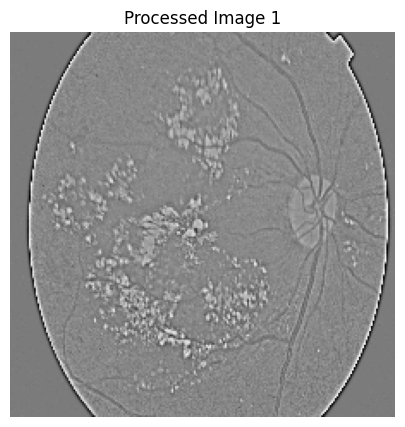

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the directory path where your processed images are stored
processed_dir = '/content/drive/MyDrive/processed_images'

# List processed image files
processed_files = [os.path.join(processed_dir, file) for file in os.listdir(processed_dir) if file.endswith('.png')]

# Define the number of images to display
num_images_to_display = min(len(processed_files), 3)  # Display up to 3 images or fewer if there are fewer processed images

# Load and display processed images
plt.figure(figsize=(15, 5))
for i in range(num_images_to_display):
    # Read the image
    img = cv2.imread(processed_files[i], cv2.IMREAD_GRAYSCALE)

    # Display the image
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Processed Image {i + 1}')
    plt.axis('off')

plt.show()


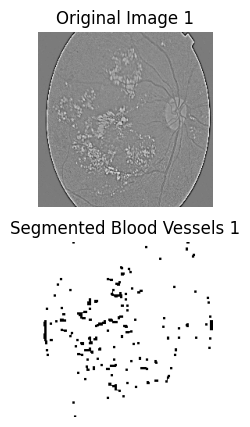

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the directory path where your processed images are stored
processed_dir = '/content/drive/MyDrive/processed_images'

# List processed image files
processed_files = [os.path.join(processed_dir, file) for file in os.listdir(processed_dir) if file.endswith('.png')]

# Define the number of images to process (you can adjust this number as needed)
num_images_to_process = min(len(processed_files), 3)  # Process up to 3 images or fewer if there are fewer processed images

# Function to perform blood vessel segmentation using adaptive thresholding
def segment_blood_vessels(image):
    # Apply adaptive thresholding to binarize the image
    binary_img = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

    # Apply morphological operations to enhance the segmentation
    kernel = np.ones((3, 3), np.uint8)
    binary_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)
    binary_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

    return binary_img

# Process and display segmented blood vessels for each image
plt.figure(figsize=(15, 5))
for i in range(num_images_to_process):
    # Read the image
    img = cv2.imread(processed_files[i], cv2.IMREAD_GRAYSCALE)

    # Segment blood vessels
    segmented_img = segment_blood_vessels(img)

    # Display original and segmented images
    plt.subplot(2, num_images_to_process, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Original Image {i + 1}')
    plt.axis('off')

    plt.subplot(2, num_images_to_process, num_images_to_process + i + 1)
    plt.imshow(segmented_img, cmap='binary')
    plt.title(f'Segmented Blood Vessels {i + 1}')
    plt.axis('off')

plt.show()


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the directory path where your processed images are stored
processed_dir = '/content/drive/MyDrive/processed_images'

# List processed image files
processed_files = [os.path.join(processed_dir, file) for file in os.listdir(processed_dir) if file.endswith('.png')]

# Define the number of images to process (you can adjust this number as needed)
num_images_to_process = min(len(processed_files), 3)  # Process up to 3 images or fewer if there are fewer processed images

# Function to calculate properties of blood vessels
def calculate_vessel_properties(segmented_img):
    # Calculate total length of blood vessels (number of foreground pixels)
    total_length = np.sum(segmented_img / 255)

    # Calculate total area of blood vessels (sum of pixel values)
    total_area = np.sum(segmented_img)

    return total_length, total_area

# Process and display properties of blood vessels for each image
for i in range(num_images_to_process):
    # Read the segmented image
    segmented_img = cv2.imread(processed_files[i], cv2.IMREAD_GRAYSCALE)

    # Calculate properties of blood vessels
    total_length, total_area = calculate_vessel_properties(segmented_img)

    # Display properties
    print(f'Image {i + 1}:')
    print(f'Total length of blood vessels: {total_length} pixels')
    print(f'Total area of blood vessels: {total_area} pixels')
    print()


Image 1:
Total length of blood vessels: 27374.42352941176 pixels
Total area of blood vessels: 6980478 pixels



Average length of blood vessels across 1 images: 27374.42 pixels
Average area of blood vessels across 1 images: 6980478.00 pixels


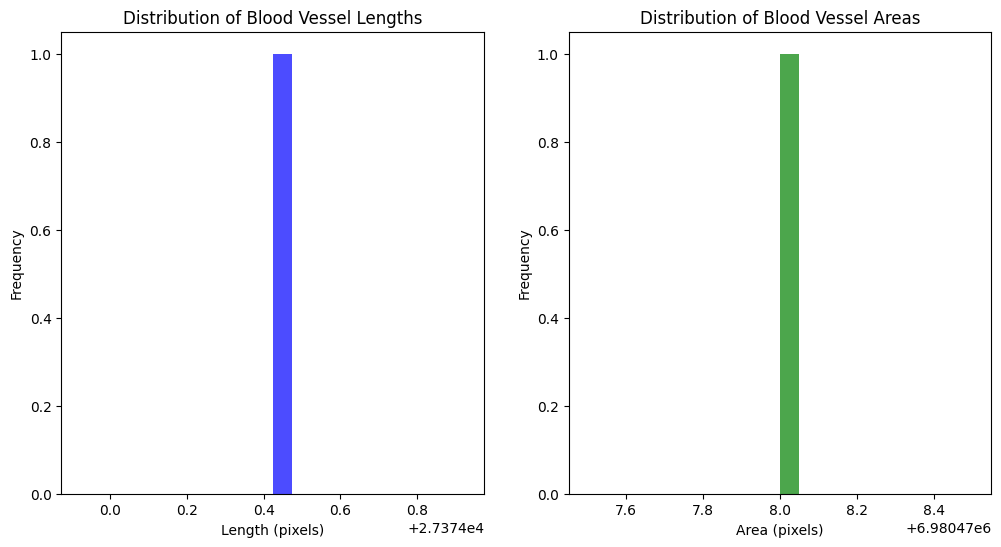

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the directory path where your processed images are stored
processed_dir = '/content/drive/MyDrive/processed_images'

# List processed image files
processed_files = [os.path.join(processed_dir, file) for file in os.listdir(processed_dir) if file.endswith('.png')]

# Define the number of images to process (you can adjust this number as needed)
num_images_to_process = min(len(processed_files), 3)  # Process up to 3 images or fewer if there are fewer processed images

# Function to calculate properties of blood vessels
def calculate_vessel_properties(segmented_img):
    # Calculate total length of blood vessels (number of foreground pixels)
    total_length = np.sum(segmented_img / 255)

    # Calculate total area of blood vessels (sum of pixel values)
    total_area = np.sum(segmented_img)

    return total_length, total_area

# Initialize lists to store lengths and areas of blood vessels
lengths = []
areas = []

# Process and collect properties of blood vessels for each image
for i in range(num_images_to_process):
    # Read the segmented image
    segmented_img = cv2.imread(processed_files[i], cv2.IMREAD_GRAYSCALE)

    # Calculate properties of blood vessels
    total_length, total_area = calculate_vessel_properties(segmented_img)

    # Store properties
    lengths.append(total_length)
    areas.append(total_area)

# Calculate average length and area of blood vessels
avg_length = np.mean(lengths)
avg_area = np.mean(areas)

# Display average properties
print(f'Average length of blood vessels across {num_images_to_process} images: {avg_length:.2f} pixels')
print(f'Average area of blood vessels across {num_images_to_process} images: {avg_area:.2f} pixels')

# Visualize distribution of lengths and areas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(lengths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Blood Vessel Lengths')
plt.xlabel('Length (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(areas, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Blood Vessel Areas')
plt.xlabel('Area (pixels)')
plt.ylabel('Frequency')

plt.show()


Average length and area of blood vessels for each category:
Category: Moderate
  Average length: 26767.31 pixels
  Average area: 6825665.25 pixels

Category: Severe
  Average length: 26674.03 pixels
  Average area: 6801876.63 pixels

Category: Mild
  Average length: 26779.55 pixels
  Average area: 6828785.68 pixels

Category: Proliferate_DR
  Average length: 26711.11 pixels
  Average area: 6811334.11 pixels

Category: No_DR
  Average length: 26650.81 pixels
  Average area: 6795957.30 pixels



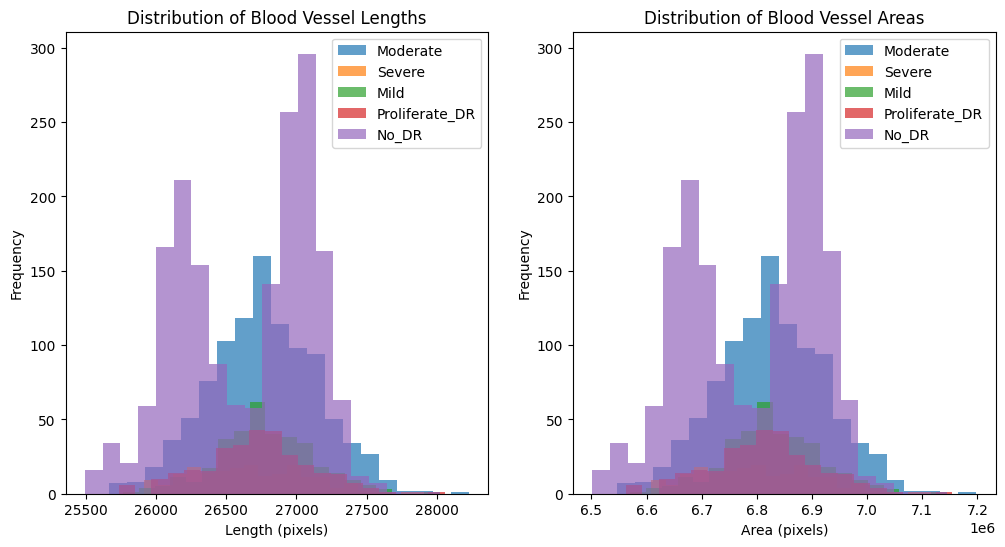

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the directory path where your Gaussian filtered images are stored
gaussian_dir = '/content/drive/MyDrive/gaussian_filtered_images'

# List subdirectories (categories) in the Gaussian filtered images directory
categories = [category for category in os.listdir(gaussian_dir) if os.path.isdir(os.path.join(gaussian_dir, category))]

# Function to calculate properties of blood vessels
def calculate_vessel_properties(segmented_img):
    # Calculate total length of blood vessels (number of foreground pixels)
    total_length = np.sum(segmented_img / 255)

    # Calculate total area of blood vessels (sum of pixel values)
    total_area = np.sum(segmented_img)

    return total_length, total_area

# Initialize dictionaries to store lengths and areas of blood vessels for each category
lengths_dict = {category: [] for category in categories}
areas_dict = {category: [] for category in categories}

# Process and collect properties of blood vessels for each category
for category in categories:
    # Define the directory path for the current category
    category_dir = os.path.join(gaussian_dir, category)

    # List image files in the current category directory
    image_files = [os.path.join(category_dir, file) for file in os.listdir(category_dir) if file.endswith('.png')]

    # Process images in the current category
    for image_file in image_files:
        # Read the segmented image
        segmented_img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

        # Calculate properties of blood vessels
        total_length, total_area = calculate_vessel_properties(segmented_img)

        # Store properties for the current category
        lengths_dict[category].append(total_length)
        areas_dict[category].append(total_area)

# Calculate average length and area of blood vessels for each category
avg_lengths_dict = {category: np.mean(lengths) for category, lengths in lengths_dict.items()}
avg_areas_dict = {category: np.mean(areas) for category, areas in areas_dict.items()}

# Display average properties for each category
print('Average length and area of blood vessels for each category:')
for category in categories:
    print(f'Category: {category}')
    print(f'  Average length: {avg_lengths_dict[category]:.2f} pixels')
    print(f'  Average area: {avg_areas_dict[category]:.2f} pixels')
    print()

# Visualize distribution of lengths and areas for each category
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for category in categories:
    plt.hist(lengths_dict[category], bins=20, alpha=0.7, label=category)
plt.title('Distribution of Blood Vessel Lengths')
plt.xlabel('Length (pixels)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
for category in categories:
    plt.hist(areas_dict[category], bins=20, alpha=0.7, label=category)
plt.title('Distribution of Blood Vessel Areas')
plt.xlabel('Area (pixels)')
plt.ylabel('Frequency')
plt.legend()

plt.show()


Average SSIM for each category:
Category: Moderate
  Average SSIM: 1.0000

Category: Severe
  Average SSIM: 1.0000

Category: Mild
  Average SSIM: 1.0000

Category: Proliferate_DR
  Average SSIM: 1.0000

Category: No_DR
  Average SSIM: 1.0000



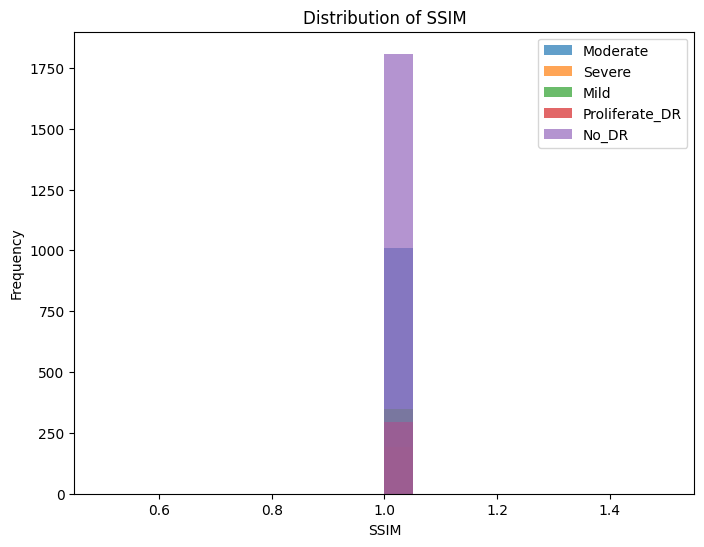

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim

# Define the directory path where your Gaussian filtered images are stored
gaussian_dir = '/content/drive/MyDrive/gaussian_filtered_images'

# List subdirectories (categories) in the Gaussian filtered images directory
categories = [category for category in os.listdir(gaussian_dir) if os.path.isdir(os.path.join(gaussian_dir, category))]

# Function to calculate SSIM between two images
def calculate_ssim(image1, image2):
    ssim = compare_ssim(image1, image2)
    return ssim

# Initialize dictionaries to store SSIM values for each category
ssim_dict = {category: [] for category in categories}

# Process and collect SSIM values for each category
for category in categories:
    # Define the directory path for the current category
    category_dir = os.path.join(gaussian_dir, category)

    # List image files in the current category directory
    image_files = [os.path.join(category_dir, file) for file in os.listdir(category_dir) if file.endswith('.png')]

    # Process images in the current category
    for image_file in image_files:
        # Read the segmented image
        segmented_img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

        # Calculate SSIM (comparing the filtered image with itself)
        ssim_value = calculate_ssim(segmented_img, segmented_img)

        # Store SSIM value for the current category
        ssim_dict[category].append(ssim_value)

# Calculate average SSIM for each category
avg_ssim_dict = {category: np.mean(ssim_values) for category, ssim_values in ssim_dict.items()}

# Display average SSIM for each category
print('Average SSIM for each category:')
for category in categories:
    print(f'Category: {category}')
    print(f'  Average SSIM: {avg_ssim_dict[category]:.4f}')
    print()

# Visualize distribution of SSIM for each category
plt.figure(figsize=(8, 6))

for category in categories:
    plt.hist(ssim_dict[category], bins=20, alpha=0.7, label=category)

plt.title('Distribution of SSIM')
plt.xlabel('SSIM')
plt.ylabel('Frequency')
plt.legend()
plt.show()
